<a href="https://colab.research.google.com/github/Haseeb-zai30/new_repo/blob/main/Vendor_performance_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Environment Setup and Library Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sqlite3
import scipy.stats as stats
from scipy.stats import ttest_ind
warnings.filterwarnings('ignore')



In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Database Connection

In [4]:
#loading db
conn = sqlite3.connect('/content/drive/MyDrive/Colab Notebooks/data analytics project/data/database.db')

The project data is stored in a centralized SQLite database created during the data
ingestion phase. Instead of working directly with raw CSV files, this approach enables
efficient querying, consistency across analyses, and better performance when working
with large datasets.

## Exploring Available Tables

In [5]:
tables = pd.read_sql_query(
    "SELECT name FROM sqlite_master WHERE type='table'",
    conn
)['name'].tolist()

print(tables)


['begin_inventory', 'end_inventory', 'purchases', 'vendor_invoice', 'purchase_prices', 'sales', 'vendor_sales_summary']


## Loading Vendor Sales Summary Data

In [6]:
df=pd.read_sql_query("select * from vendor_sales_summary",conn)

In [7]:
df


,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,TotalGrossProfit,ProfitMargin,StockTurnover,SalesToPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,142049.0,5.101920e+06,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247.0,4.819073e+06,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187140.0,4.538121e+06,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,200412.0,4.475973e+06,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,135838.0,4.223108e+06,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,750.0,2,2.64,5.0,1.595000e+01,10.96,0.55,27100.41,13.31,83.448276,2.500000,6.041667
10688,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50.0,6,2.34,134.0,6.566000e+01,1.47,7.04,50293.62,63.32,96.436186,22.333333,28.059829
10689,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,0.99,50.0,2,1.48,2.0,1.980000e+00,0.99,0.10,14069.87,0.50,25.252525,1.000000,1.337838
10690,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,200.0,1,1.47,72.0,1.432800e+02,77.61,15.12,257032.07,141.81,98.974037,72.000000,97.469388


## EDA

In the earlier phase of this project, EDA was performed on raw and intermediate tables to:

Understand data quality and structure

* Identify key variables and their relationships

* Validate assumptions (sales, purchases, pricing, freight)
* Engineer and finalize the vendor_sales_summary table

* That initial EDA was data-preparatory in nature.

## NOW

* Analyze vendor performance at a granular level
* Identify inefficiencies, outliers, and risk patterns

* Understand profitability, stock movement, and pricing behavior

* Support decision-making related to vendor selection, inventory planning, and cost optimization

This EDA focuses on insights, not data construction.

## Statistical Summary of Vendor-Level Metrics

In [8]:
#summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,10692.0,1.065065e+04,18753.519148,2.00,3951.000000,7153.000000,9552.000000,2.013590e+05
Brand,10692.0,1.803923e+04,12662.187074,58.00,5793.500000,18761.500000,25514.250000,9.063100e+04
PurchasePrice,10692.0,2.438530e+01,109.269375,0.36,6.840000,10.455000,19.482500,5.681810e+03
ActualPrice,10692.0,3.564367e+01,148.246016,0.49,10.990000,15.990000,28.990000,7.499990e+03
Volume,10692.0,8.473605e+02,664.309212,50.00,750.000000,750.000000,750.000000,2.000000e+04
TotalPurchaseQuantity,10692.0,3.140887e+03,11095.086769,1.00,36.000000,262.000000,1975.750000,3.376600e+05
TotalPurchaseDollars,10692.0,3.010669e+04,123067.799627,0.71,453.457500,3655.465000,20738.245000,3.811252e+06
TotalSalesQuantity,10692.0,3.077482e+03,10952.851391,0.00,33.000000,261.000000,1929.250000,3.349390e+05
TotalSalesDollars,10692.0,4.223907e+04,167655.265984,0.00,729.220000,5298.045000,28396.915000,5.101920e+06
TotalSalesPrice,10692.0,1.879378e+04,44952.773386,0.00,289.710000,2857.800000,16059.562500,6.728193e+05


* The high variance in Vendor and Brand IDs confirms a large, diverse supplier base with significant variation in product offerings.

* While average purchase and sales quantities align, high standard deviations and zero-sales records highlight significant inefficiencies and potential overstocking.

* A consistent markup exists between purchase and actual prices, though extreme outliers suggest a mix of premium specialty products and potential pricing anomalies.

* Large spreads in freight costs indicate that logistics is a primary—and highly variable—driver of total cost, directly impacting net profitability.

* A small group of high-performers drives most of the profit, while several vendor–brand combinations are currently operating at a net loss.

* The presence of -inf margins points to "dead stock" (zero sales) that requires immediate filtering or strategic intervention.

* Median stock turnover is low (barely cycling once), though isolated demand spikes and rapid sell-throughs exist for a select few top-tier vendors.

## Distribution Analysis of Numerical Variables

visualized the distribution of all numerical features in the vendor_sales_summary dataset

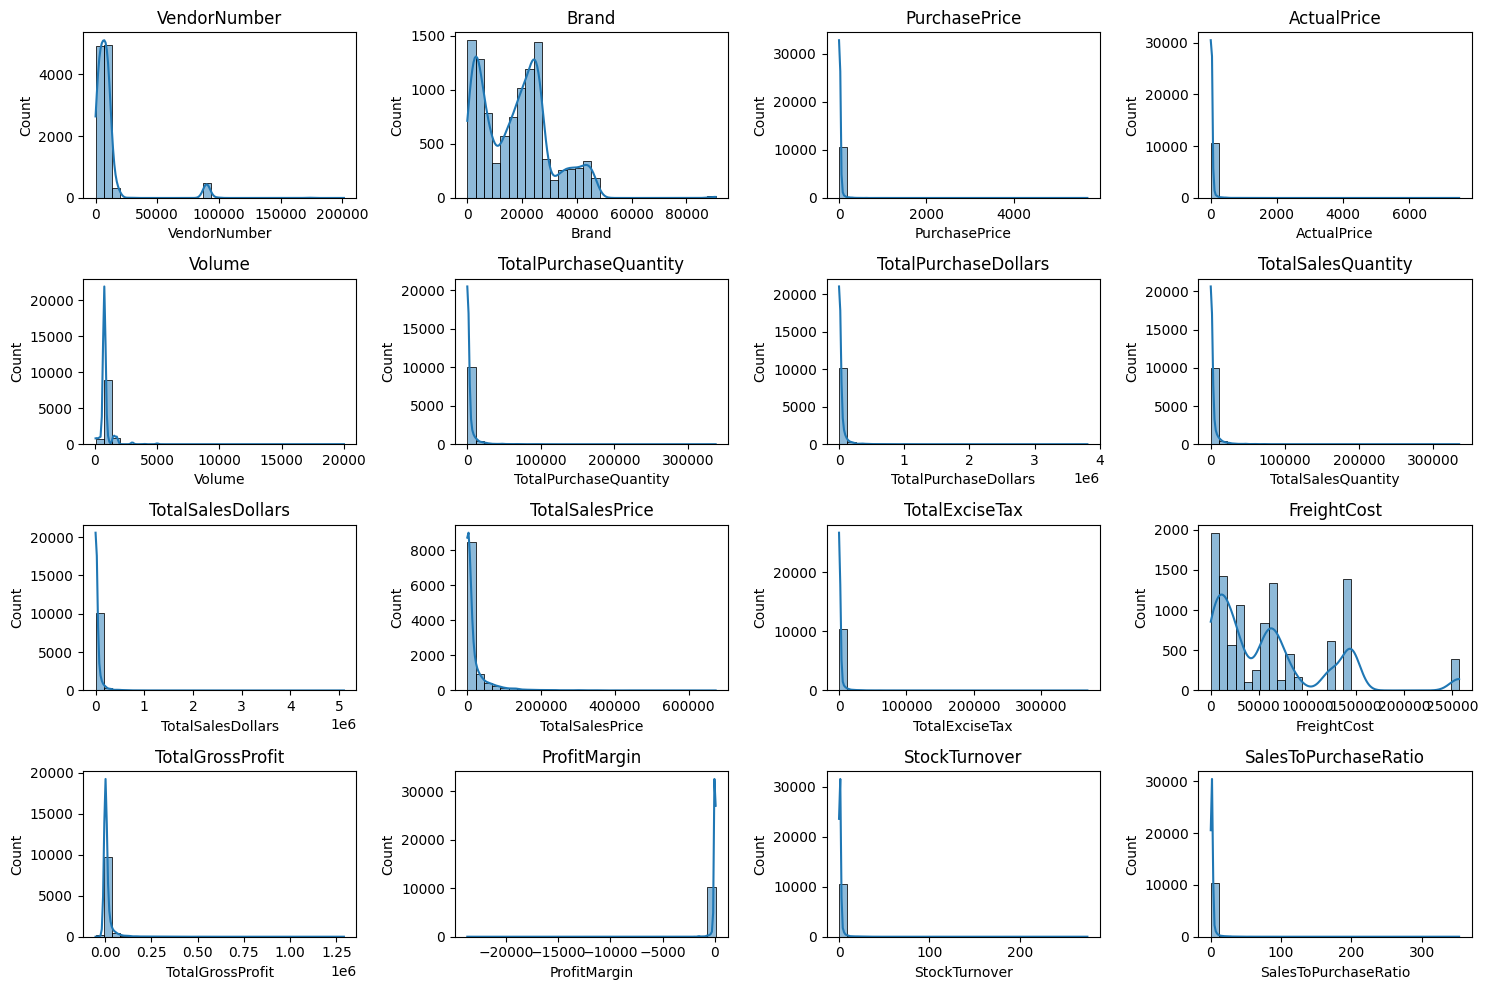

In [9]:
# Distribution Plots for Numerical Columns
numerical_cols = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i+1)  # Adjust grid layout as needed
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

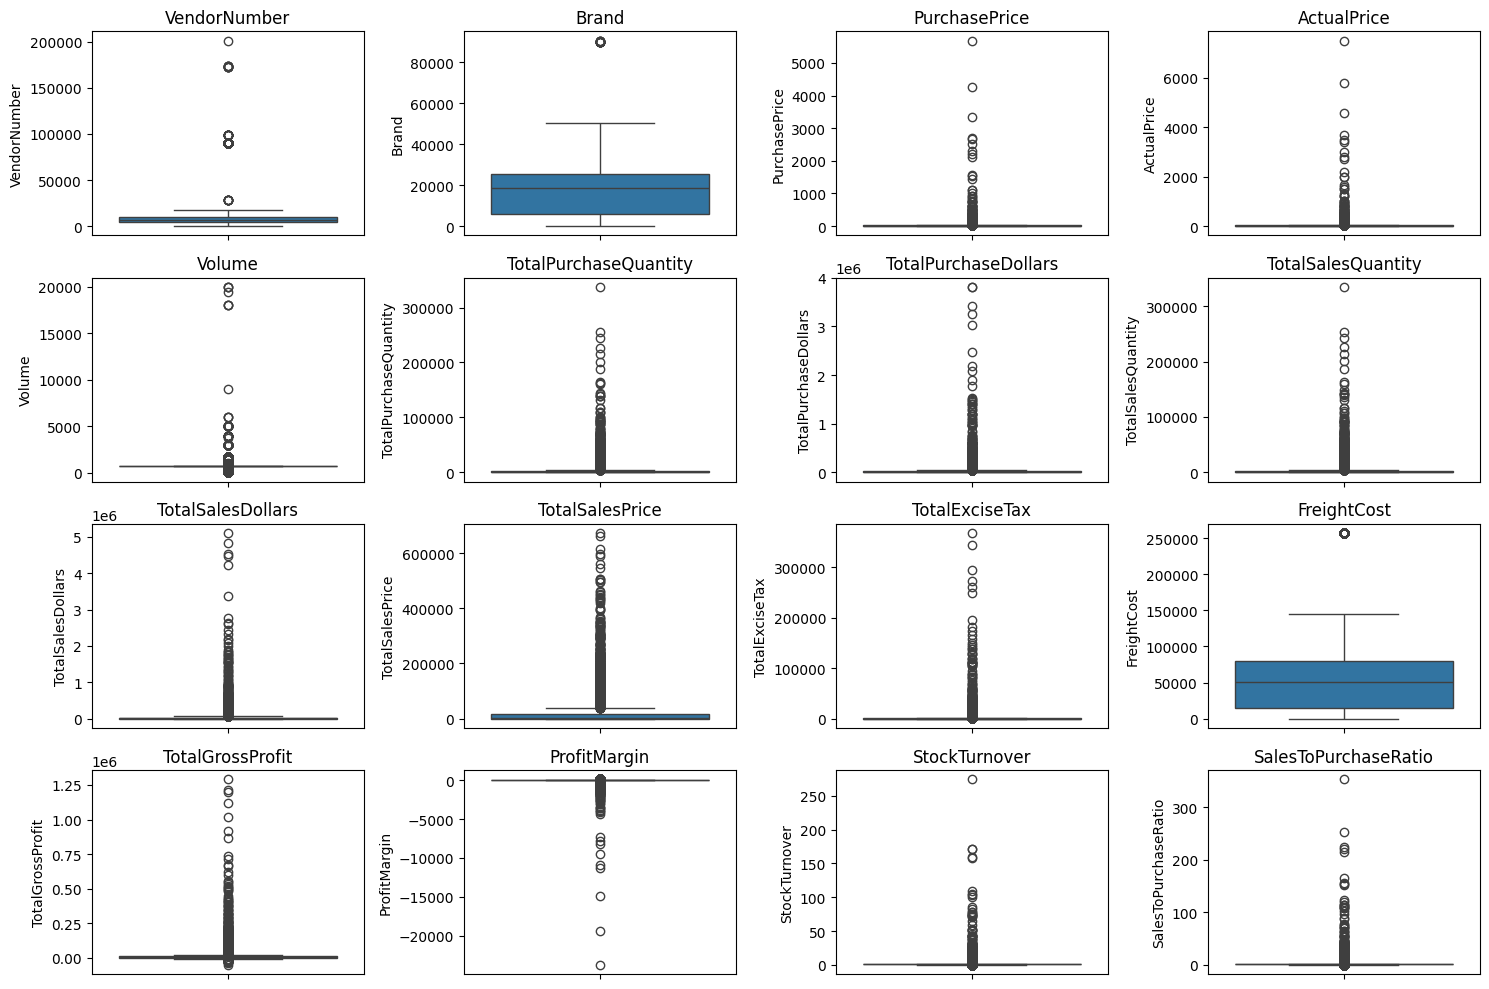

In [10]:
# BOX Plot Plots for Numerical Columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i+1)  # Adjust grid layout as needed
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

* A very small number of vendors make almost all the money, while most others sell very little.
*  More than half of your products don't even sell once during the period, meaning you have too much stock sitting around.

* Some products are being sold at a loss or aren't selling at all, which shows up as "dead stock".

* For the items that do sell, you usually make about 30% profit, which is a healthy sign for the business.

* Moving these products costs a lot of money (averaging over $61,000), and it changes a lot depending on the vendor.

* There is a giant gap between a normal vendor making $1,399 and a super vendor making over 1 million.

## Loss-Making Transactions:
 The minimum Gross Profit stands at -52,002.78, revealing that certain products are being sold at a significant loss. This likely stems from aggressive discounting or cost structures that exceed the selling price.
## Infinite Profit Margin Errors:
 A Profit Margin minimum of $-\infty$ indicates critical data points where revenue is either zero or significantly outweighed by costs, skewing the financial analysis.
## Stagnant Inventory:
 Both Sales Quantity and Sales Dollars have minimum values of 0, identifying "dead stock"—products that have been purchased for inventory but have failed to generate any sales.

# Performance Variance & Outliers
## Pricing Disparity:
 There is a massive gap between average prices (mean of 24.39 to 35.64) and peak prices (max of 5,681.81 to 7,499.99), suggesting a product mix that ranges from budget items to high-end luxury goods.

## Logistical Volatility:
Freight costs show extreme variation, ranging from 0.09 to over 257,000. This suggests a mix of small individual shipments and massive bulk logistics, or potentially major inefficiencies in the shipping process.

## Stock Velocity:
Stock turnover varies wildly (0 to 274.5). While some items move instantly, others remain static. Turnover values greater than 1 highlight instances where sales are being fulfilled by clearing out older, existing backstock.

## Data Filtering

In [11]:
#filtring the unwanted 0 values
df=pd.read_sql_query("""select *
FROM vendor_sales_summary
WHERE TotalGrossProfit  > 0
AND ProfitMargin > 0
AND TotalSalesQuantity > 0""",conn)

* The dataset represents active, profitable vendors only

* Efficiency metrics like StockTurnover and SalesToPurchaseRatio become reliable

* Profitability analysis reflects real operational performance, not accounting anomalies

In [12]:
df.shape

(8565, 18)

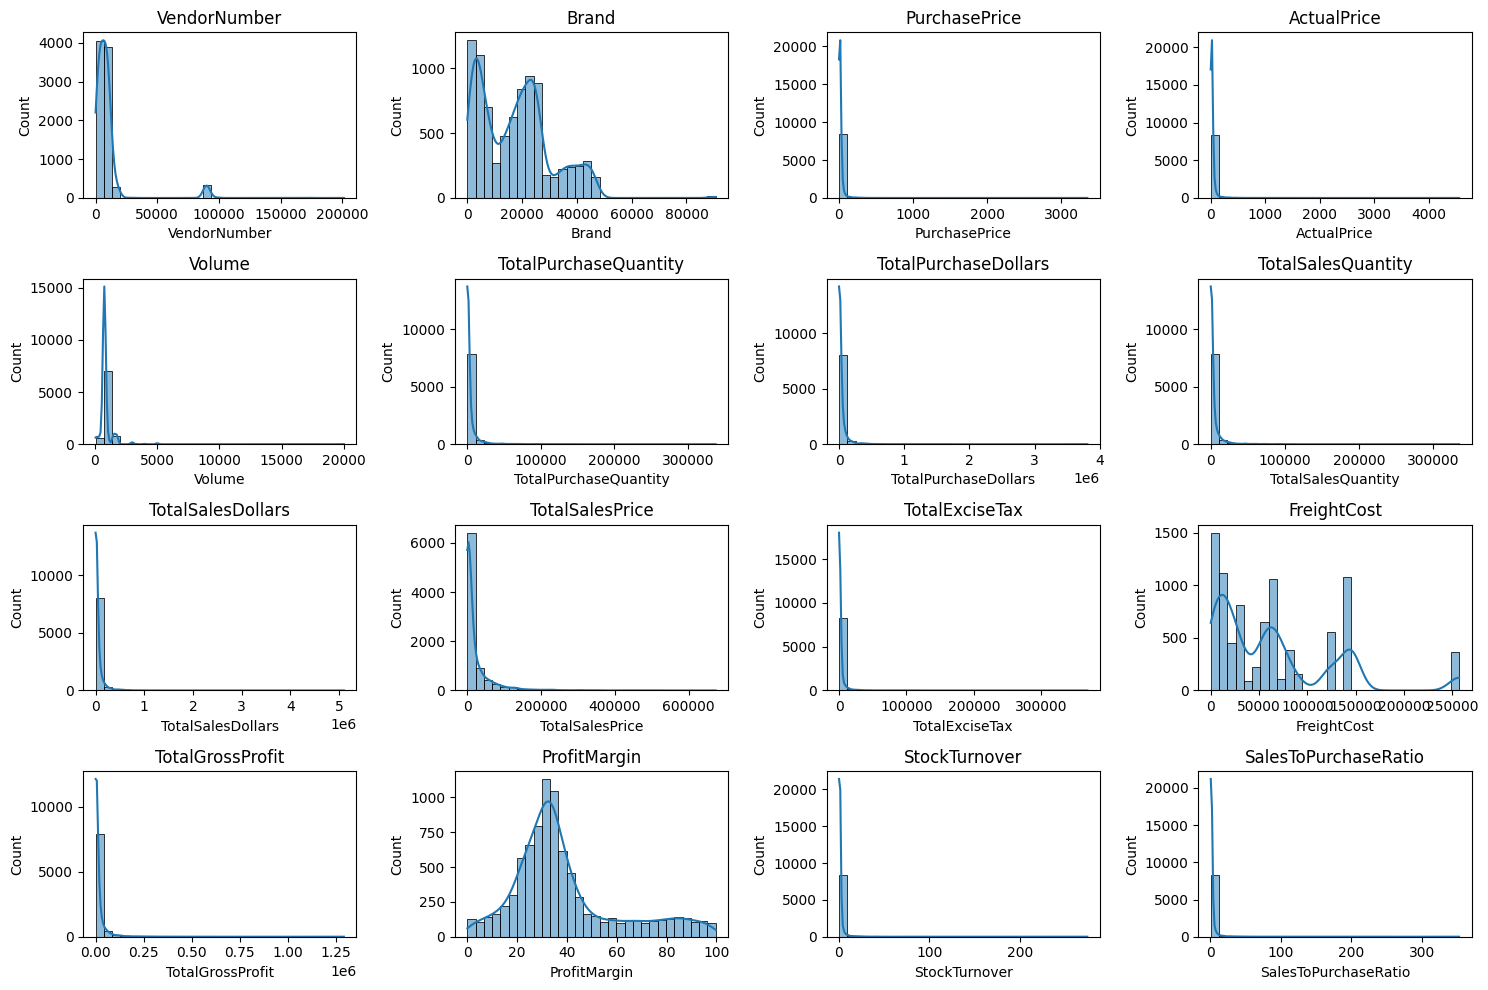

In [13]:
# Distribution Plots for Numerical Columns
numerical_cols = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i+1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

## Categorical Distribution Analysis

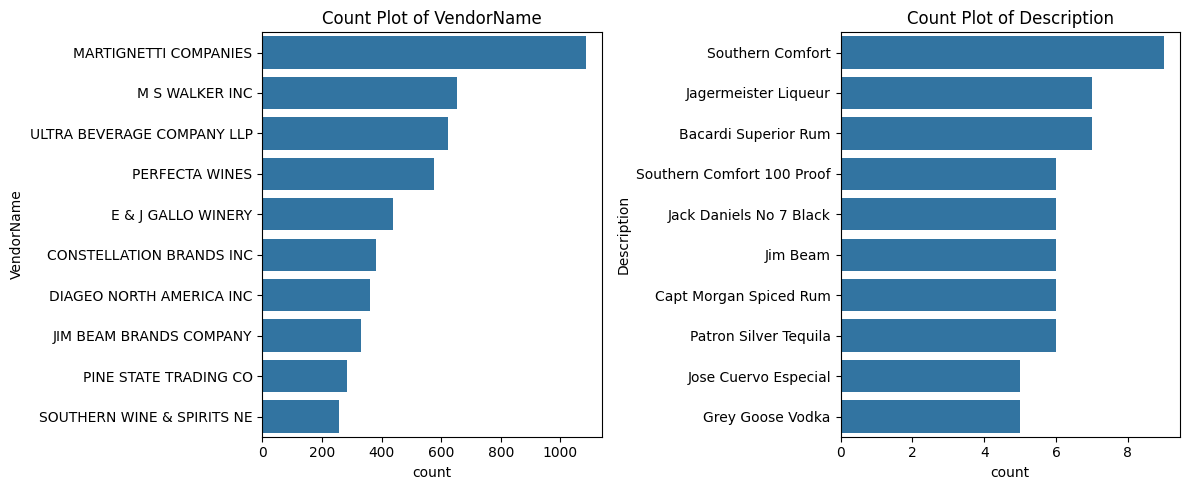

In [14]:
# Count Plots for Categorical Columns
categorical_cols = ["VendorName", "Description"]

plt.figure(figsize=(12, 5))
for i, col in enumerate(categorical_cols):
    plt.subplot(1, 2, i+1)
    sns.countplot(y=df[col], order=df[col].value_counts().index[:10]) # Top 10 categories
    plt.title(f"Count Plot of {col}")
plt.tight_layout()
plt.show()

* Detect vendor dominance or dependency risks

* Spot frequently traded SKUs that may require closer margin and turnover analysis

* Prioritize vendors and products for deeper profitability and efficiency evaluation

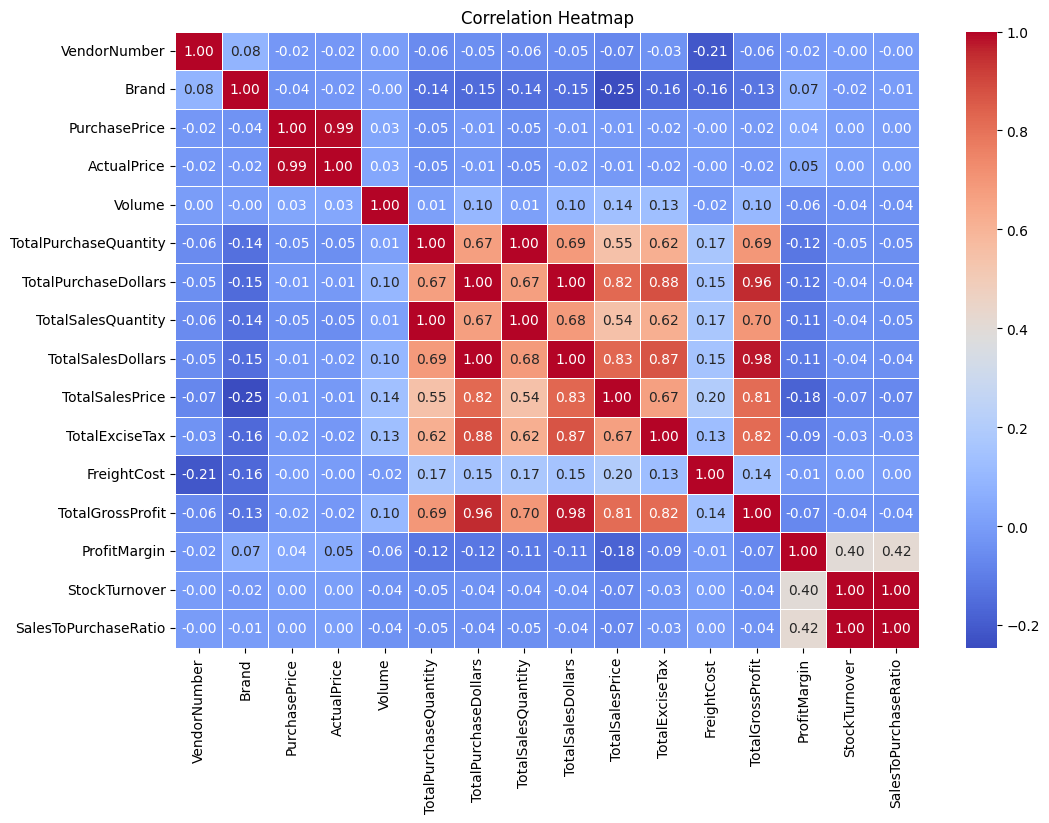

In [15]:
# corelation heat map
plt.figure(figsize=(12, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True,fmt=".2f" , cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

## Correlation Insights
PurchasePrice has weak correlations with TotalSalesDollars (-0.012) and GrossProfit (-0.016), suggesting that price variations do not significantly impact sales revenue or profit.

Strong correlation between total purchase quantity and total sales quantity (0.999), confirming efficient inventory turnover.

Negative correlation between profit margin & total sales price (-0.179) suggests that as sales price increases, margins decrease, possibly due to competitive pricing pressures.

StockTurnover has weak negative correlations with both GrossProfit (-0.038) and ProfitMargin (-0.055), indicating that faster turnover does not necessarily result in higher profitability.

# Data Analysis

### Identify underperforming brands that require promotional or pricing adjustments.

In [16]:
brand_performance=df.groupby('Description').agg({'TotalSalesDollars':'sum','ProfitMargin':'mean'}).reset_index()

In [17]:
low_sales_threshold=brand_performance['TotalSalesDollars'].quantile(0.15)
high_margin_threshold=brand_performance['ProfitMargin'].quantile(0.85)

In [18]:
low_sales_threshold

np.float64(560.299)

In [19]:
high_margin_threshold

np.float64(64.97017552750111)

In [20]:
# Filter brands with low sales but high profit margins
target_brands = brand_performance[
    (brand_performance['TotalSalesDollars'] <= low_sales_threshold) &
    (brand_performance['ProfitMargin'] >= high_margin_threshold)
]
print("Brands with Low Sales but High Profit Margins:")
display(target_brands.sort_values('TotalSalesDollars'))

Brands with Low Sales but High Profit Margins:


,Description,TotalSalesDollars,ProfitMargin
6199,Santa Rita Organic Svgn Bl,9.99,66.466466
2369,Debauchery Pnt Nr,11.58,65.975820
2070,Concannon Glen Ellen Wh Zin,15.95,83.448276
2188,Crown Royal Apple,27.86,89.806174
6237,Sauza Sprklg Wild Berry Marg,27.96,82.153076
...,...,...,...
5074,Nanbu Bijin Southern Beauty,535.68,76.747312
2271,Dad's Hat Rye Whiskey,538.89,81.851584
57,A Bichot Clos Marechaudes,539.94,67.740860
6245,Sbragia Home Ranch Merlot,549.75,66.444748


The resulting products:

* Generate exceptionally high margins

* Have low market visibility or sales volume

* May suffer from:

     * Limited promotion

    * Poor shelf placement

    * Niche targeting rather than mass appeal

* These items represent high-ROI growth candidates because:

* Increasing their sales does not require improving margins

* Even modest volume increases can significantly boost profits

low sales but high profits

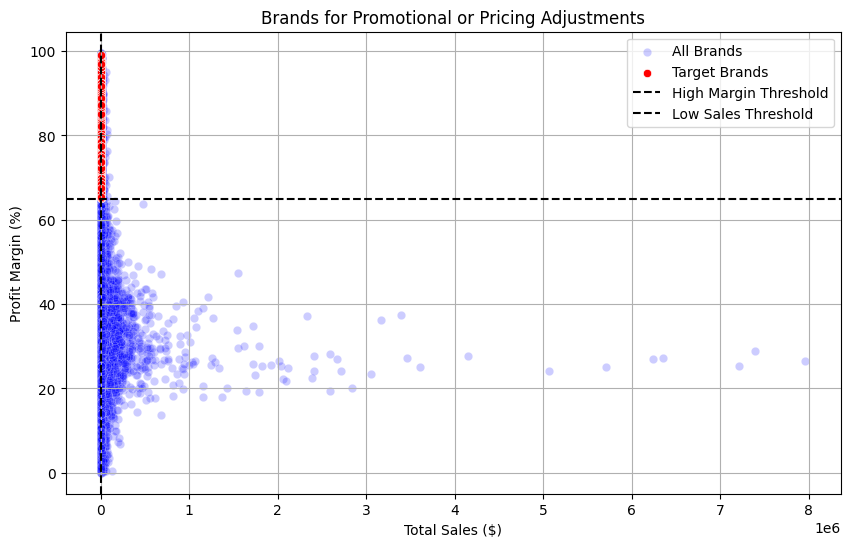

In [21]:
plt.figure(figsize=(10, 6))

# Plot all brands in blue
sns.scatterplot(data=brand_performance, x='TotalSalesDollars', y='ProfitMargin', color="blue", label="All Brands", alpha = 0.2)

# Overlay target brands in red
sns.scatterplot(data=target_brands, x='TotalSalesDollars', y='ProfitMargin', color="red", label="Target Brands")

# Add threshold lines for visual reference
plt.axhline(high_margin_threshold, linestyle='--', color='black', label="High Margin Threshold")
plt.axvline(low_sales_threshold, linestyle='--', color='black', label="Low Sales Threshold")

# Labeling the chart
plt.xlabel("Total Sales ($)")
plt.ylabel("Profit Margin (%)")
plt.title("Brands for Promotional or Pricing Adjustments")
plt.legend()
plt.grid(True)
plt.show()

### Outcome
group of brands (the red dots) that make a huge profit on every item sold but currently have very low total sales, making them the perfect candidates for a big marketing push.

# Determine top vendors & Brand contributing to sales and gross profit.

This section identifies the top revenue-generating vendors and products to understand where the majority of sales originate. By isolating the highest contributors, we can assess business concentration risk, vendor dependency, and brand dominance.

In [26]:
top_vendors=df.groupby('VendorName')['TotalSalesDollars'].sum().nlargest(10)

In [23]:
top_brands=df.groupby('Description')['TotalSalesDollars'].sum().nlargest(10)

In [24]:
top_brands

,TotalSalesDollars
Description,
Jack Daniels No 7 Black,7964746.76
Tito's Handmade Vodka,7399657.58
Grey Goose Vodka,7209608.06
Capt Morgan Spiced Rum,6356320.62
Absolut 80 Proof,6244752.03
Jameson Irish Whiskey,5715759.69
Ketel One Vodka,5070083.56
Baileys Irish Cream,4150122.07
Kahlua,3604858.66


In [27]:
top_vendors

,TotalSalesDollars
VendorName,
DIAGEO NORTH AMERICA INC,6.799010e+07
MARTIGNETTI COMPANIES,3.933036e+07
PERNOD RICARD USA,3.206320e+07
JIM BEAM BRANDS COMPANY,3.142302e+07
BACARDI USA INC,2.485482e+07
CONSTELLATION BRANDS INC,2.421875e+07
E & J GALLO WINERY,1.839990e+07
BROWN-FORMAN CORP,1.824723e+07
ULTRA BEVERAGE COMPANY LLP,1.650254e+07


In [28]:
def format_dollars(value):
    if value >= 1_000_000:
        return f"{value / 1_000_000:.2f}M"
    elif value >= 1_000:
        return f"{value / 1_000:.2f}K"
    else:
        return str(value)

In [29]:
top_brands_numerical = df.groupby('Description')['TotalSalesDollars'].sum().nlargest(10)

In [30]:
top_vendors_numerical = df.groupby('VendorName')['TotalSalesDollars'].sum().nlargest(10)

In [31]:
top_brands

,TotalSalesDollars
Description,
Jack Daniels No 7 Black,7964746.76
Tito's Handmade Vodka,7399657.58
Grey Goose Vodka,7209608.06
Capt Morgan Spiced Rum,6356320.62
Absolut 80 Proof,6244752.03
Jameson Irish Whiskey,5715759.69
Ketel One Vodka,5070083.56
Baileys Irish Cream,4150122.07
Kahlua,3604858.66


In [32]:
top_vendors

,TotalSalesDollars
VendorName,
DIAGEO NORTH AMERICA INC,6.799010e+07
MARTIGNETTI COMPANIES,3.933036e+07
PERNOD RICARD USA,3.206320e+07
JIM BEAM BRANDS COMPANY,3.142302e+07
BACARDI USA INC,2.485482e+07
CONSTELLATION BRANDS INC,2.421875e+07
E & J GALLO WINERY,1.839990e+07
BROWN-FORMAN CORP,1.824723e+07
ULTRA BEVERAGE COMPANY LLP,1.650254e+07


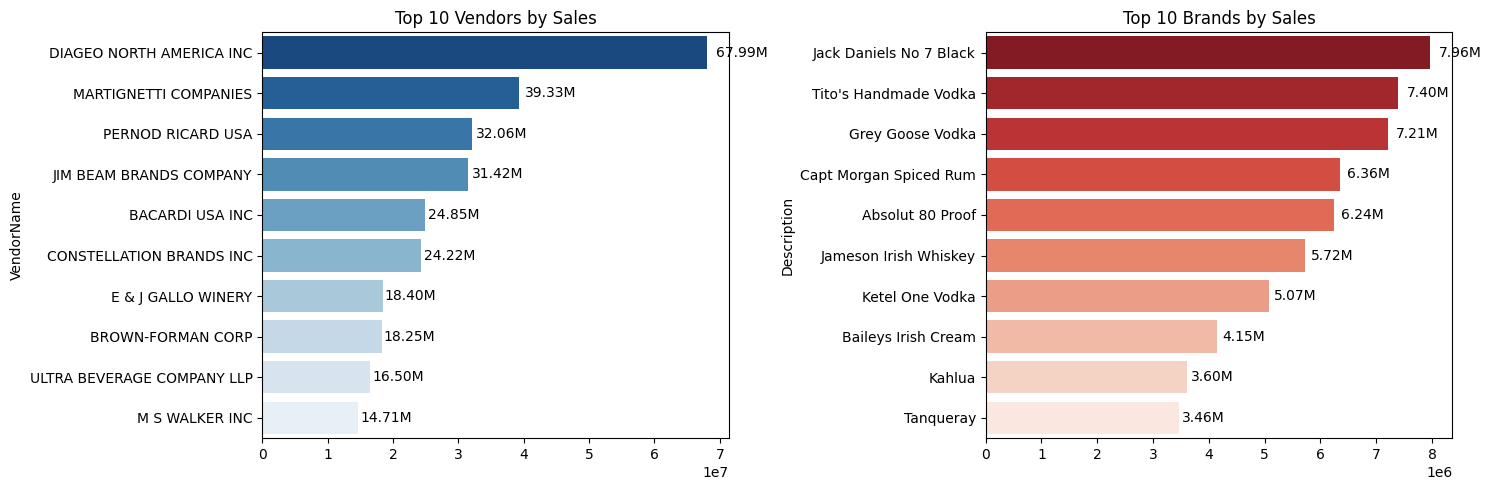

In [33]:
plt.figure(figsize=(15, 5))

# Plot for Top Vendors
plt.subplot(1, 2, 1)
# Use numerical values for plotting
ax1 = sns.barplot(y=top_vendors_numerical.index, x=top_vendors_numerical.values, palette="Blues_r")
plt.title("Top 10 Vendors by Sales")

for bar in ax1.patches:
    ax1.text(bar.get_width() + (bar.get_width() * 0.02),
             bar.get_y() + bar.get_height() / 2,
             format_dollars(bar.get_width()),
             ha='left', va='center', fontsize=10, color='black')

# Plot for Top Brands
plt.subplot(1, 2, 2)
# Use numerical values for plotting
ax2 = sns.barplot(y=top_brands_numerical.index.astype(str), x=top_brands_numerical.values, palette="Reds_r")
plt.title("Top 10 Brands by Sales")

for bar in ax2.patches:
    ax2.text(bar.get_width() + (bar.get_width() * 0.02),
             bar.get_y() + bar.get_height() / 2,
             format_dollars(bar.get_width()),
             ha='left', va='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()

## Revenue Concentration Analysis:

identified the top revenue-generating vendors and products to understand where the majority of sales originate. By isolating the highest contributors, we can assess business concentration risk, vendor dependency, and brand dominance.

### Which vendor contribute most to total purchase dollars?

In [34]:
vendor_performance=df.groupby('VendorName').agg({'TotalPurchaseDollars':'sum',
                                                 'TotalGrossProfit':'sum',
                                                 'TotalSalesDollars':'sum'}).reset_index()

In [35]:
vendor_performance['PurchaseContribution%']=vendor_performance['TotalPurchaseDollars']/vendor_performance['TotalPurchaseDollars'].sum()

In [36]:
vendor_performance=round(vendor_performance.sort_values('PurchaseContribution%',ascending=False),2)

In [37]:
top_vendors=vendor_performance.head(10)
top_vendors['TotalPurchaseDollars']=top_vendors['TotalPurchaseDollars'].apply(format_dollars)
top_vendors['TotalGrossProfit']=top_vendors['TotalGrossProfit'].apply(format_dollars)
top_vendors['TotalSalesDollars']=top_vendors['TotalSalesDollars'].apply(format_dollars)
top_vendors

,VendorName,TotalPurchaseDollars,TotalGrossProfit,TotalSalesDollars,PurchaseContribution%
25,DIAGEO NORTH AMERICA INC,50.10M,17.89M,67.99M,0.16
57,MARTIGNETTI COMPANIES,25.50M,13.83M,39.33M,0.08
68,PERNOD RICARD USA,23.85M,8.21M,32.06M,0.08
46,JIM BEAM BRANDS COMPANY,23.49M,7.93M,31.42M,0.08
6,BACARDI USA INC,17.43M,7.42M,24.85M,0.06
20,CONSTELLATION BRANDS INC,15.27M,8.95M,24.22M,0.05
11,BROWN-FORMAN CORP,13.24M,5.01M,18.25M,0.04
30,E & J GALLO WINERY,12.07M,6.33M,18.40M,0.04
106,ULTRA BEVERAGE COMPANY LLP,11.17M,5.34M,16.50M,0.04
53,M S WALKER INC,9.76M,4.94M,14.71M,0.03


In [38]:
vendor_performance.shape

(119, 5)

In [39]:
top_vendors['PurchaseContribution%'].sum()*100

np.float64(66.00000000000001)

In [40]:
top_vendors['CumulativeContribution%']=top_vendors['PurchaseContribution%'].cumsum()*100
top_vendors

,VendorName,TotalPurchaseDollars,TotalGrossProfit,TotalSalesDollars,PurchaseContribution%,CumulativeContribution%
25,DIAGEO NORTH AMERICA INC,50.10M,17.89M,67.99M,0.16,16.0
57,MARTIGNETTI COMPANIES,25.50M,13.83M,39.33M,0.08,24.0
68,PERNOD RICARD USA,23.85M,8.21M,32.06M,0.08,32.0
46,JIM BEAM BRANDS COMPANY,23.49M,7.93M,31.42M,0.08,40.0
6,BACARDI USA INC,17.43M,7.42M,24.85M,0.06,46.0
20,CONSTELLATION BRANDS INC,15.27M,8.95M,24.22M,0.05,51.0
11,BROWN-FORMAN CORP,13.24M,5.01M,18.25M,0.04,55.0
30,E & J GALLO WINERY,12.07M,6.33M,18.40M,0.04,59.0
106,ULTRA BEVERAGE COMPANY LLP,11.17M,5.34M,16.50M,0.04,63.0
53,M S WALKER INC,9.76M,4.94M,14.71M,0.03,66.0


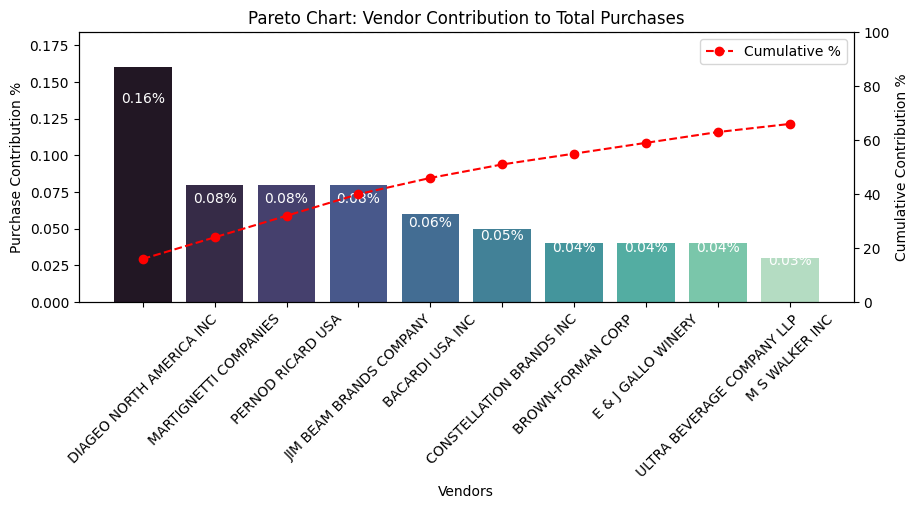

In [46]:
fig, ax1 = plt.subplots(figsize=(10, 4.5))

sns.barplot(
    x=top_vendors['VendorName'],
    y=top_vendors['PurchaseContribution%'],
    palette="mako",
    ax=ax1
)

for i, value in enumerate(top_vendors['PurchaseContribution%']):
    ax1.text(i, value * 0.85, f"{value}%", ha='center', fontsize=10, color='white')

ax2 = ax1.twinx()
ax2.plot(
    top_vendors['VendorName'],
    top_vendors['CumulativeContribution%'],
    color='red',
    marker='o',
    linestyle='dashed',
    label='Cumulative %'
)

bar_max = top_vendors['PurchaseContribution%'].max()
ax1.set_ylim(0, bar_max * 1.15)
ax2.set_ylim(0, 100)

ax1.set_xticklabels(top_vendors['VendorName'], rotation=45)
ax1.set_ylabel('Purchase Contribution %')
ax2.set_ylabel('Cumulative Contribution %')
ax1.set_xlabel('Vendors')
ax1.set_title('Pareto Chart: Vendor Contribution to Total Purchases')

plt.subplots_adjust(bottom=0.28)
ax2.axhline(100, color='gray', linestyle='dashed', alpha=0.7)
ax2.legend(loc='upper right')

plt.show()


A small subset of vendors and products generates a large share of revenue

### find Total Purchase contribution of Top vendors

In [47]:
top_vendors.to_csv('top_vendors.csv',index=False)

In [48]:
print(f"Total Purchase contribution of Top 10 vendors is {top_vendors['PurchaseContribution%'].sum()*100}%")

Total Purchase contribution of Top 10 vendors is 66.00000000000001%


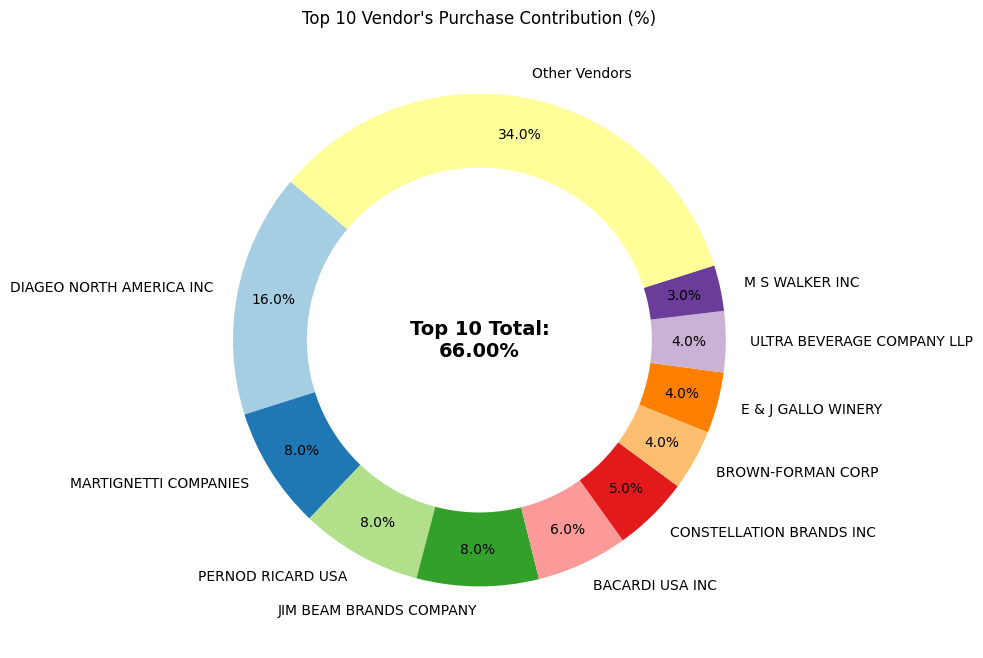

In [49]:
vendors = list(top_vendors['VendorName'].values)
purchase_contributions = list(top_vendors['PurchaseContribution%'].values*100)
total_contribution = sum(purchase_contributions)
remaining_contribution = 100 - total_contribution

# Append "Other Vendors" category
vendors.append("Other Vendors")
purchase_contributions.append(remaining_contribution)

# Donut Chart
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(purchase_contributions, labels=vendors, autopct='%1.1f%%',
                                  startangle=140, pctdistance=0.85, colors=plt.cm.Paired.colors)

# Draw a white circle in the center to create a "donut" effect
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

# Add Total Contribution annotation in the center
plt.text(0, 0, f"Top 10 Total:\n{total_contribution:.2f}%", fontsize=14, fontweight='bold', ha='center', va='center')

plt.title("Top 10 Vendor's Purchase Contribution (%)")
plt.show()

### 66% → controlled by Top 10 vendors

### 34% → spread across hundreds of smaller vendors

## Order Size vs Unit Purchase Price Analysis

### does purchasing in bulk reduces the cost and what is the optimal purchase volume for cost saving?

Examined how purchase order size impacts the unit purchase price, with the goal of identifying pricing efficiencies and potential volume discount effects across vendors and products.

In [50]:
df['UnitPurchasePrice']=df['TotalPurchaseDollars']/df['TotalPurchaseQuantity']

In [51]:
df.head()

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,TotalGrossProfit,ProfitMargin,StockTurnover,SalesToPurchaseRatio,UnitPurchasePrice
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,142049.0,5.101920e+06,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647,26.27
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247.0,4.819073e+06,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830,23.19
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187140.0,4.538121e+06,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594,18.24
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,200412.0,4.475973e+06,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493,16.17
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,135838.0,4.223108e+06,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897,21.89


In [52]:
df['orderSize']=pd.qcut(df['TotalPurchaseQuantity'], q=3, labels=['small', 'medium','large'])

In [53]:
df[['orderSize','TotalPurchaseQuantity']]

,orderSize,TotalPurchaseQuantity
0,large,145080
1,large,164038
2,large,187407
3,large,201682
4,large,138109
...,...,...
8560,small,2
8561,small,6
8562,small,2
8563,small,1


In [54]:
df.groupby('orderSize')[['UnitPurchasePrice']].mean()

,UnitPurchasePrice
orderSize,
small,39.057543
medium,15.486414
large,10.777625


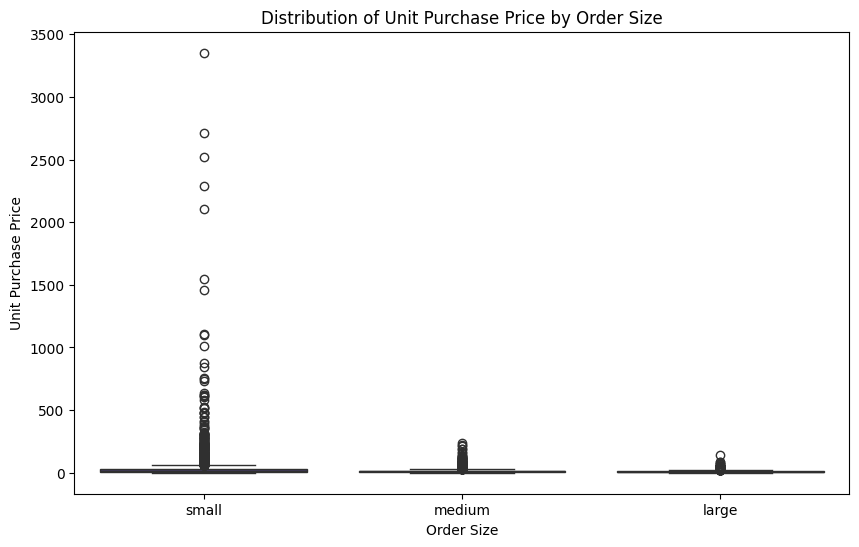

In [55]:
plt.figure(figsize=(10, 6))

# Box plot for Unit Purchase Price
sns.boxplot(x='orderSize', y='UnitPurchasePrice', data=df, palette="mako")
plt.title("Distribution of Unit Purchase Price by Order Size")
plt.xlabel("Order Size")
plt.ylabel("Unit Purchase Price")
plt.show()

There is a clear inverse relationship between order size and unit price; as order size increases, the average unit purchase price decreases.

The "small" order size category contains extreme outliers, with some unit prices exceeding $3,000, whereas "large" orders show much tighter price consistency.

The data suggests that high-end, expensive items are typically purchased in small quantities, while high-volume "well" brands drive the large order categories.

## Low Stock Turnover Vendors

### Which vendor has low inventory turnover indicating excess stock and low moving produts?

The stock turnover ratio measures how quickly purchased inventory is sold. Vendors with a StockTurnover < 1 are selling less than the quantity they purchase, indicating slow-moving inventory or potential overstocking.

In [56]:
df[df['StockTurnover']<1].groupby('VendorName')[['StockTurnover']].mean().sort_values('StockTurnover',ascending=True).head(10)

,StockTurnover
VendorName,
ALISA CARR BEVERAGES,0.615385
HIGHLAND WINE MERCHANTS LLC,0.708333
PARK STREET IMPORTS LLC,0.751306
Circa Wines,0.755676
Dunn Wine Brokers,0.766022
CENTEUR IMPORTS LLC,0.773953
SMOKY QUARTZ DISTILLERY LLC,0.783835
TAMWORTH DISTILLING,0.797078
THE IMPORTED GRAPE LLC,0.807569


## Unsold Inventory Value Analysis

### How much capital is in left inventry and which vendor have have most of it

Quantified the financial exposure tied up in unsold inventory for each vendor.

In [57]:
df['unsoldInventoryValue']=(df['TotalPurchaseQuantity']-df['TotalSalesQuantity'])*df['UnitPurchasePrice']
print("unsold value=",format_dollars(df['unsoldInventoryValue'].sum()))

unsold value= 2.71M


**Total unsold inventory value across all vendors: ~$2.71M**

In [58]:
inventry_value_per_vendor=df.groupby('VendorName')[['unsoldInventoryValue']].sum().reset_index().sort_values('unsoldInventoryValue',ascending=False)
inventry_value_per_vendor['unsoldInventoryValue'] = inventry_value_per_vendor['unsoldInventoryValue'].apply(format_dollars)

In [59]:
inventry_value_per_vendor.head(10)

,VendorName,unsoldInventoryValue
25,DIAGEO NORTH AMERICA INC,722.21K
46,JIM BEAM BRANDS COMPANY,554.67K
68,PERNOD RICARD USA,470.63K
116,WILLIAM GRANT & SONS INC,401.96K
30,E & J GALLO WINERY,228.28K
79,SAZERAC CO INC,198.44K
11,BROWN-FORMAN CORP,177.73K
20,CONSTELLATION BRANDS INC,133.62K
61,MOET HENNESSY USA INC,126.48K
77,REMY COINTREAU USA INC,118.60K


## Profit Margin Comparison: Top vs Low Vendors

### what is 95% confidence interval for profit margin of top and low performing vendors

Compared profit margins between top-performing vendors (high sales) and low-performing vendors (low sales) to understand if higher sales are associated with higher profitability

In [60]:
top_threshold=df['TotalSalesDollars'].quantile(0.75)
low_threshold=df['TotalSalesDollars'].quantile(0.25)

In [61]:
top_vendors=df[df['TotalSalesDollars']>=top_threshold]['ProfitMargin'].dropna()
low_vendors=df[df['TotalSalesDollars']<=low_threshold]['ProfitMargin'].dropna()

In [62]:
top_vendors

,ProfitMargin
0,25.297693
1,21.062810
2,24.675786
3,27.139908
4,28.412764
...,...
3523,79.684817
3681,85.782102
4751,93.085860
4920,95.012530


In [63]:
low_vendors

,ProfitMargin
5631,4.111764
5652,6.145626
5701,12.007271
5704,1.677308
5724,7.239599
...,...
8560,83.448276
8561,96.436186
8562,25.252525
8563,98.974037


In [64]:
def confidence_interval(data,confidence_level=0.95):
  mean_val=np.mean(data)
  std_err=np.std(data,ddof=1)/np.sqrt(len(data))
  t_critical=stats.t.ppf(1+confidence_level/2,df=len(data)-1)
  marginal_err=t_critical*std_err
  return mean_val,mean_val-marginal_err,mean_val+marginal_err

Top Vendors 95% CI: (nan, nan), Mean: 31.17
Low Vendors 95% CI: (nan, nan), Mean: 41.55


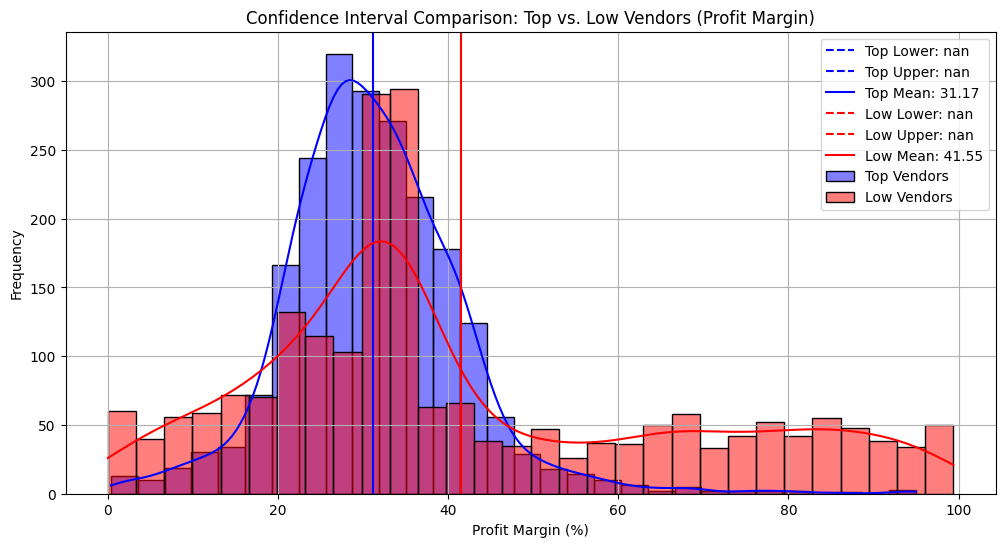

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate statistics and 95% Confidence Intervals
# Note: This assumes a pre-defined 'confidence_interval' function exists
top_mean, top_lower, top_upper = confidence_interval(top_vendors)
low_mean, low_lower, low_upper = confidence_interval(low_vendors)

# Display numerical results
print(f"Top Vendors 95% CI: ({top_lower:.2f}, {top_upper:.2f}), Mean: {top_mean:.2f}")
print(f"Low Vendors 95% CI: ({low_lower:.2f}, {low_upper:.2f}), Mean: {low_mean:.2f}")

plt.figure(figsize=(12, 6))

# Top Vendors Plot: Distribution and markers
sns.histplot(top_vendors, kde=True, color="blue", bins=30, alpha=0.5, label="Top Vendors")
plt.axvline(top_lower, color="blue", linestyle="--", label=f"Top Lower: {top_lower:.2f}")
plt.axvline(top_upper, color="blue", linestyle="--", label=f"Top Upper: {top_upper:.2f}")
plt.axvline(top_mean, color="blue", linestyle="-", label=f"Top Mean: {top_mean:.2f}")

# Low Vendors Plot: Distribution and markers
sns.histplot(low_vendors, kde=True, color="red", bins=30, alpha=0.5, label="Low Vendors")
plt.axvline(low_lower, color="red", linestyle="--", label=f"Low Lower: {low_lower:.2f}")
plt.axvline(low_upper, color="red", linestyle="--", label=f"Low Upper: {low_upper:.2f}")
plt.axvline(low_mean, color="red", linestyle="-", label=f"Low Mean: {low_mean:.2f}")

# Finalize Plot: Labels and styling
plt.title("Confidence Interval Comparison: Top vs. Low Vendors (Profit Margin)")
plt.xlabel("Profit Margin (%)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

### 2. The Results: Profit Margins
When we look at the actual profit margins, there is a surprising twist:

**Low-Performers (Lower Sales):** These vendors actually have higher profit margins, usually between 40.48% and 42.62%. They likely sell their items at a "premium" price but don't sell very many of them.

**Top-Performers (Higher Sales):** These vendors have lower profit margins, usually between 30.74% and 31.61%. They make less money per item but make up for it by selling a massive volume of products.

### Is there a significant difference in profit margins between top-performing and low-performing vendors?
Hypothesis:$H_0$ (Null Hypothesis): There is no significant difference in the mean profit margins of top-performing and low-performing vendors.

$H_1$ (Alternative Hypothesis): The mean profit margins of top-performing and low-performing vendors are significantly different.

In [66]:
top_threshold = df["TotalSalesDollars"].quantile(0.75)
low_threshold = df["TotalSalesDollars"].quantile(0.25)

top_vendors = df[df["TotalSalesDollars"] >= top_threshold]["ProfitMargin"].dropna()
low_vendors = df[df["TotalSalesDollars"] <= low_threshold]["ProfitMargin"].dropna()

# Perform Two-Sample T-Test
t_stat, p_value = ttest_ind(top_vendors, low_vendors, equal_var=False)

# Print results
print(f"T-Statistic: {t_stat:.4f}, P-Value: {p_value:.4f}")
if p_value < 0.05:
    print("Reject H0: There is a significant difference in profit margins between top and low-performing vendors.")
else:
    print("Fail to Reject H0: No significant difference in profit margins.")

T-Statistic: -17.6440, P-Value: 0.0000
Reject H0: There is a significant difference in profit margins between top and low-performing vendors.
